In [1]:
m= float(input("Enter the mass of the planet(m): "))
M= float(input("Enter the mass of the star(M): "))
from scipy.constants import G, parsec
from astropy.constants import M_sun
G= G*M_sun*1e3/(parsec*1e12)
#Here, we take G as 1
try:
    r= float(input("Enter the distance of the planet from the star(r): "))
except ValueError:
    print("Manually input value of r")
import astropy.units as u
G= G / u.kg
G= float(G)
print(G)
nu = G*(M+m)

Enter the mass of the planet(m): 100
Enter the mass of the star(M): 4.1e6
Enter the distance of the planet from the star(r): 0.1
4.3009172702950275e-06


Intial position is 1.0
Initial velocity is 1.0
Angular momentum vector is 1.0
Angular momentum is 1.0
Semi latus rectum is 0.232506216059209
Theoretical eccentricity is 0.767493783940791
Eccentricity vector is [0.767493783940791, 0.0]
Max distance is 1.1315457050948234
Semi-major axis is 0.5424989967070698
Eccentricity is 0.7674402369880222


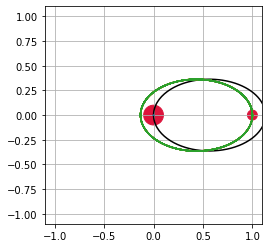

In [15]:
import numpy as np
from math import sqrt
from matplotlib.patches import Circle #(or something else)
import matplotlib.pyplot as plt
r= 1
gridArea= [-(r+r/10), r+r/10, -(r+r/10), r+r/10]
#gridArea= [-(0.001), 0.001, -(0.001), 0.001]
plt.axis(gridArea)
plt.grid(b="on")
ax=plt.gca()
ax.set_aspect("equal")
#ax.add_artist(object imported from matplotlib.patches and defined)
ax.autoscale_view()
class Body:
    _instances=[]
    def __init__(self,name,position,radius,mass,velocity):
        self.name= name
        self.position= position
        self.radius= radius
        self.mass= mass
        self.velocity= velocity
        self.placeBody
        Body._instances.append(self)
        
    def placeBody(self):
        createBody= Circle(self.position, radius= self.radius, color= "crimson")
        ax.add_patch(createBody)
        
    def Motion_relative(self,other):
        #Computing distance between other body
        sx, sy= self.position[0], self.position[1]
        ox,oy= other.position[0], other.position[1]
        r_sp = sqrt((ox - sx)**2 + (oy - sy)**2)
        a_x= float(G*other.mass*(ox-sx)/(r_sp ** 3))
        a_y= float(G*other.mass*(oy-sy)/(r_sp ** 3))
        #print(ox-sx)
        #print(a_x)
        #print(ox)
        return a_x, a_y, r_sp

def loop(bodies):
    Period, deltat= 10, 0.001 #we define timestep and total time here. Also, if we change anything here, change also for Egraph
    interval= int((Period/deltat)+1)
    data1=[]
    data2=[]
    accel= {}
    E_r= []
    E_v1, E_v2= [], []
    
    for body in bodies:
        body.velocity_x= float(0)
        body.velocity_y= float(body.velocity)
        body.placeBody()
        
    for t in np.linspace(0,Period,interval):
        for body in bodies: 
            for other in bodies:
                # Don't calculate the body's accel to itself
                if body is other:
                    continue
                a_x, a_y,r_sp = body.Motion_relative(other)
            accel[body]= (a_x,a_y,r_sp)
            
        for body in bodies:
            a_x, a_y, r_sp= accel[body]
            body.v_xhalf= body.velocity_x + a_x *deltat/2
            body.v_yhalf= body.velocity_y + a_y *deltat/2
            xpos= body.position[0] + body.v_xhalf*deltat
            ypos= body.position[1] + body.v_yhalf*deltat
            body.position= (xpos,ypos)
            body.velocity= sqrt((body.velocity_x ) ** 2 + (body.velocity_y) ** 2)
            if body is bodies[0]:
                data1.append([xpos, ypos])
                E_r.append(r_sp)
                E_v1.append(body.velocity)
            else:
                data2.append([xpos,ypos])
                E_v2.append(body.velocity)
            #print(body.v_xhalf)
            #print(xpos)
        
        for body in bodies:
                #r_sp = sqrt((target_body.xpos - external_body.position[0])**2 + (target_body.ypos - external_body.position[1])**2) #updated distance of planet from star
            for other in bodies:
                # Don't calculate the body's accel to itself
                if body is other:
                    continue
                a_x, a_y,r_sp = body.Motion_relative(other)
            accel[body]= (a_x,a_y)
        
        for body in bodies:
            #Updating the velocity
            a_x, a_y= accel[body]
            #body_now.accel_x= float(G*m2*(xpos-(external_body.position[0]))/(r_sp ** 3))
            #body_now.accel_y= float(G*m2*(ypos-(external_body.position[1]))/(r_sp ** 3))
            body.velocity_x= body.v_xhalf + a_x*deltat/2
            body.velocity_y= body.v_yhalf + a_y*deltat/2
            #print(body.v_xhalf)
            #print(a_x)
            #body_now.position= (xpos, ypos)
            #data.append([body_now.position[0], body_now.position[1]])
    plt.plot([x[0] for x in data1], [x[1] for x in data1])
    plt.plot([x[0] for x in data2], [x[1] for x in data2])
    
    c=[]
    for f, b in zip(data1, data2):
        u, v=b[0]-f[0],[b[1]-f[1]]
        c.append([u,v])
        
    plt.plot([x[0] for x in c], [x[1] for x in c]) #plotting relative motion
    
    a=[]
    for i in c:
        a.append(i[0])
    
    b=[]
    for i in c:
        b.append(i[1])
    #print(max(b))
    e= (max(E_r)-abs(min(E_r)))/(max(E_r)+abs(min(E_r))) #or take a instead of E_r
    print("Eccentricity is", e)
    #print("Semi-latus rectum is", (max(a)-abs(min(a)))/2)
    #print("Semi-major axis is", max(b))

    
    E_v=[] #We can use a different formula to look at conservation of energy per mass, but need relative velocity
    for v1, v2 in zip(E_v1,E_v2):
        v= 0.5*(m*((v1) ** 2) + M*((v2) ** 2))
        E_v.append(v)
    E=[]
    for v, r in zip(E_v, E_r):
        Total= v- (G*m*M/r)
        E.append(Total)
    for x in range(len(E)-1):
        E[x]= abs(float((E[x]-E[x+1])/E[x]))
    del E[-1] 
    #print(max(E))
    return E #Note: Before returning any values, place any print statement before it, otherwise won't be printed
    

def AnalyticSolution(bodies):
    #In 2D:
    #First we get angular momentum (h), then use eq. p= h^2/reduced mass to get p, then find e, before
    #subbing all into this eq. r(theta)= P/(1+e*cos(theta-theta_initial))
    pos, vel = [], []
    for body in bodies:
        pos.append(body.position)
        vel.append(body.velocity)
    
    #Now get initial relative motions
    pos= [pos[0][0]-pos[1][0], pos[0][1]-pos[1][1]]
    r= np.linalg.norm(pos)
    print("Intial position is", r)
    vel= [0, vel[0]-vel[1]]
    v= np.linalg.norm(vel)
    print("Initial velocity is", v)
    
    #Calculating angular momentum
    h_vector= np.cross(pos, vel)
    h= np.linalg.norm(h_vector)
    print("Angular momentum vector is", h_vector)
    print("Angular momentum is", h)
    
    #Calculating p
    p= (h ** 2)/nu
    print("Semi latus rectum is", p)
    
    #Calculating e
    e_vector=[1,2] #Just some random no.s so that they can be replaced
    for i in range(2):
        e_vector[i]= (pos[i]*( (v ** 2) - (nu/r))- vel[i]*(np.dot(pos, vel)) )/nu
    e= np.linalg.norm(e_vector)
    print("Theoretical eccentricity is", e)
    print("Eccentricity vector is", e_vector)
    
    #Subbing into equation
    position= []
    for theta in np.linspace(0, 2*np.pi, 360):
        x= np.cos(theta) * (p/(1+e*np.cos(theta))) - pos[0]
        y= np.sin(theta) * (p/(1+e*np.cos(theta))) - pos[1]
        position.append([x, y]) 
        
    ax.plot([x[0] for x in position], [x[1] for x in position], color="black")
    
    #Finding semi-major axis and all
    pos2D = []
    for i in range(360):
        p= sqrt( (position[i][0])** 2 + (position[i][1]) ** 2)
        pos2D.append(p)
    print("Max distance is", max(pos2D))
    print("Semi-major axis is" ,(float(p)/1- (e ** 2)))
    
def main():
    Star= Body(name= "Star", position= (0,0), radius= r/10, mass=M, velocity= float(0))
    Planet= Body(name= "Planet", position= (1,0), radius= r/20, mass=m, velocity= float(1))
    AnalyticSolution([Star, Planet])
    loop([Star, Planet])
   

        
if __name__ == "__main__":
    main()

#Credit to this: https://astronomy.stackexchange.com/questions/7806/exercise-2d-orbital-mechanics-simulation-python
#and this: #Credit to this: https://astronomy.stackexchange.com/questions/7806/exercise-2d-orbital
#-mechanics-simulation-python
#for showing me how to run a simulation for an orbitfor showing me how to run a simulation for an orbit

<IPython.core.display.Javascript object>


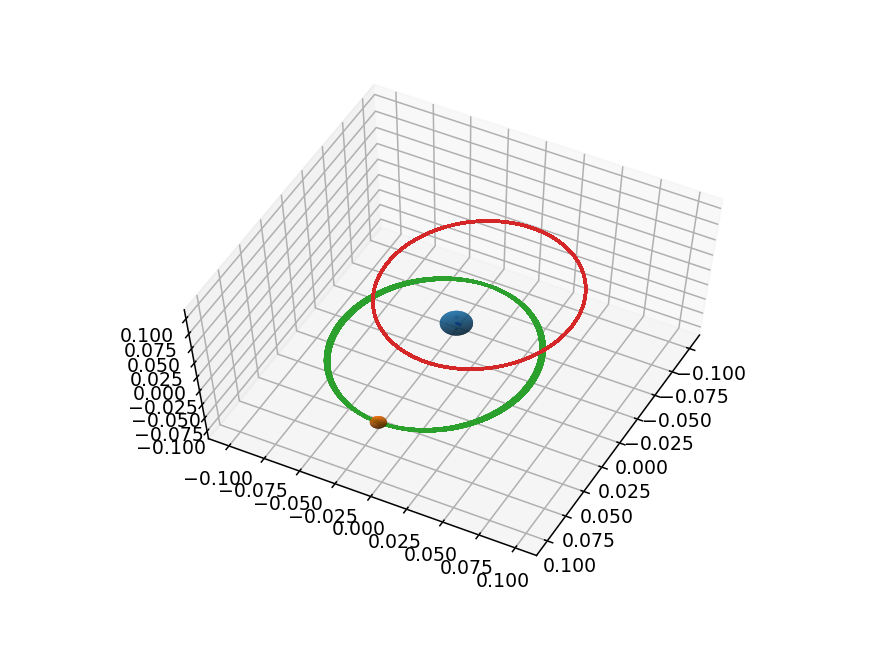

Eccentricity is 0.43291980776475053
Relative time period is 0.02365767730891422
Semi-latus rectum is 0.030212423990445415
Semi-major axis is 0.10000000000004881


<IPython.core.display.Javascript object>


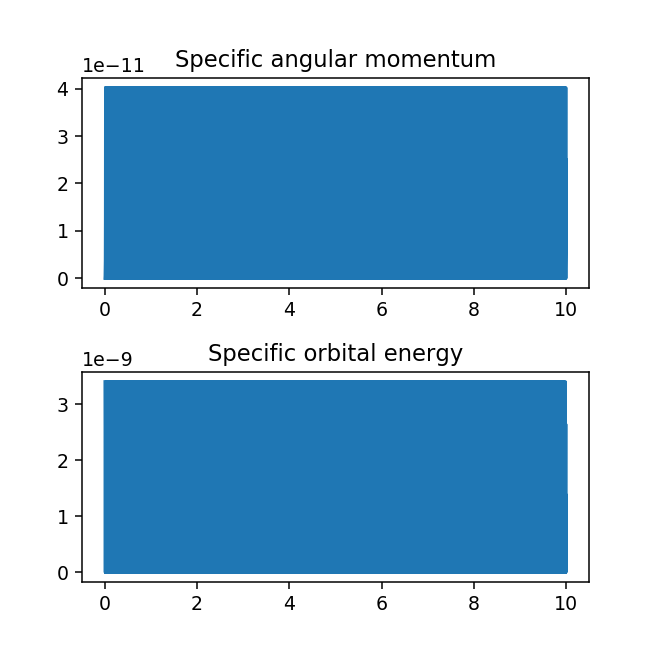

In [7]:
%matplotlib notebook
import numpy as np
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
ax = plt.axes(projection= '3d' )
ax.view_init(elev=15, azim=30) #Sets view: azim sets view angle, i.e. orientation
U= r+r/10
ax.axes.set_xlim3d(left=-U, right=U) #Sets axis limits
ax.axes.set_ylim3d(bottom=-U, top=U) 
ax.axes.set_zlim3d(bottom=-U, top=U) 
ax.autoscale_view()

class Body:
    _instances=[]
    def __init__(self,name,position,radius,mass,velocity):
        self.name= name
        self.position= position
        self.radius= radius
        self.mass= mass
        self.velocity= velocity
        self.placeBody
        Body._instances.append(self)
        
    def placeBody(self):
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        X = self.radius*(np.outer(np.cos(u), np.sin(v))) + self.position[0] #+ n, where n is position of body in space
        Y = self.radius*(np.outer(np.sin(u), np.sin(v))) + self.position[1]
        Z = self.radius*(np.outer(np.ones(np.size(u)), np.cos(v))) + self.position[2]
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
        '''
Numpy is used to create two linear arrays, one from 0 to 2 Pi that we think of as Phi, 
the azimuth angle in spherical coordinates. 
The other, from 0 to Pi, is Theta, the altitude of spherical coordinates. 
From these we calculate a set of x, y, and z that are the coordinates of points on a surface. 
Here, "np.outer" means "outer product" of two linear arrays, 
that is each of x, y, and z are matrices that contain the coordinates (x,y,z) of points on the unit sphere
or radius 10 selected by the angles u and v.
'''
        
    def Motion_relative(self,other):
        #Computing distance between other body
        sx, sy, sz= self.position[0], self.position[1], self.position[2]
        ox,oy, oz= other.position[0], other.position[1], other.position[2]
        r_sp = sqrt((ox - sx)**2 + (oy - sy)**2 + (oz - sz)**2 )
        #r_sp = sqrt((ox - sx)**2 + (oy - sy)**2)
        a_x= float(G*other.mass*(ox-sx)/(r_sp ** 3))
        a_y= float(G*other.mass*(oy-sy)/(r_sp ** 3))
        a_z= float(G*other.mass*(oz-sz)/(r_sp ** 3))
        #Look up accel for a_z
        return a_x, a_y, a_z, r_sp

def loop(bodies):
    Period, deltat= 10, 0.000001 #we define timestep and total time here. Also, if we change anything here, change also for Egraph
    interval= int((Period/deltat)+1)
    data1=[]
    data2=[]
    accel= {}
    E_r= []
    E_v1, E_v2= [], []
    E_vector1, E_vector2= [], []
    vel_rel= [bodies[0].velocity[0]- bodies[1].velocity[0], bodies[0].velocity[1]- bodies[1].velocity[1], bodies[0].velocity[2]- bodies[1].velocity[2]]
    pos_rel= [bodies[0].position[0]- bodies[1].position[0], bodies[0].position[1]- bodies[1].position[1], bodies[0].position[2]- bodies[1].position[2]]
    h_rel= np.cross(pos_rel, vel_rel)
    
    for body in bodies:
        #body.velocity_x= float(0)
        #body.velocity_y= float(body.velocity)
        body.placeBody()
        
    for t in np.linspace(0,Period,interval):
        for body in bodies: 
            for other in bodies:
                # Don't calculate the body's accel to itself
                if body is other:
                    continue
                a_x, a_y, a_z, r_sp = body.Motion_relative(other)
            accel[body]= (a_x,a_y, a_z, r_sp)
            
        for body in bodies:
            a_x, a_y, a_z, r_sp= accel[body]
            body.v_xhalf= body.velocity[0] + a_x *deltat/2
            body.v_yhalf= body.velocity[1] + a_y *deltat/2
            body.v_zhalf= body.velocity[2] + a_z *deltat/2
            xpos= body.position[0] + body.v_xhalf*deltat
            ypos= body.position[1] + body.v_yhalf*deltat
            zpos= body.position[2] + body.v_zhalf*deltat
            #posit= [body.position[0], body.position[1], body.position[2]]
            #h= np.cross(posit, body.velocity)#using angular momentum vector of previous position state and current velocity state
            body.position= [xpos,ypos,zpos]
            vel= sqrt((body.velocity[0]) ** 2 + (body.velocity[1]) ** 2 + (body.velocity[2] ** 2))
            if body is bodies[0]:
                data1.append([xpos, ypos, zpos]) #Check if we need to add zpos
                E_r.append(r_sp)
                E_vector1.append([body.velocity[0],body.velocity[1], body.velocity[2]])
                E_v1.append(vel)
            else:
                data2.append([xpos,ypos, zpos])
                E_vector2.append([body.velocity[0],body.velocity[1], body.velocity[2]])
                E_v2.append(vel)
            #print(body.v_xhalf)
            #print(xpos)
        
        for body in bodies:
                #r_sp = sqrt((target_body.xpos - external_body.position[0])**2 + (target_body.ypos - external_body.position[1])**2) #updated distance of planet from star
            for other in bodies:
                # Don't calculate the body's accel to itself
                if body is other:
                    continue
                a_x, a_y, a_z, r_sp = body.Motion_relative(other)
            accel[body]= (a_x,a_y, a_z)
        
        for body in bodies:
            #Updating the velocity
            a_x, a_y, a_z = accel[body]
            #body_now.accel_x= float(G*m2*(xpos-(external_body.position[0]))/(r_sp ** 3))
            #body_now.accel_y= float(G*m2*(ypos-(external_body.position[1]))/(r_sp ** 3))
            body.velocity[0] = body.v_xhalf + a_x*deltat/2
            body.velocity[1] = body.v_yhalf + a_y*deltat/2
            body.velocity[2] = body.v_zhalf + a_z*deltat/2
            #print(body.v_xhalf)
            #print(a_x)
            #body_now.position= (xpos, ypos)
            #data.append([body_now.position[0], body_now.position[1]])
    ax.plot([x[0] for x in data1], [x[1] for x in data1], [x[2] for x in data1], color= "blue")
    ax.plot([x[0] for x in data2], [x[1] for x in data2], [x[2] for x in data2])
    
    c=[]
    for f, b in zip(data1, data2):
        u, v, w=f[0]-b[0],f[1]-b[1],f[2]-b[2]
        #w= (h_rel[0]*u + h_rel[1]*v/(-h_rel[2]))
        c.append([u, v, w])

    ax.plot([x[0] for x in c], [x[1] for x in c], [x[2] for x in c]) #plotting relative motion
    
    
    '''a=[]
    for i in c:
        a.append(i[0])
    print(max(a))
    print(min(a))
    
    b=[]
    for i in c:
        b.append(i[1])
    print(max(b))
    print(min(b))'''
    e= (max(E_r)-abs(min(E_r)))/(max(E_r)+abs(min(E_r))) #or take a instead of E_r
    T= 2* np.pi * sqrt((max(E_r) ** 3)/ nu)
    a= max(E_r)
    l= (max(E_r)-abs(min(E_r)))/2
    print("Eccentricity is", e)
    print("Relative time period is", T/2)
    print("Semi-latus rectum is", l)
    print("Semi-major axis is", a)
    
    #Calculating energy:
    E_v=[] #We can use a different formula to look at conservation of energy per mass, but need relative velocity- just add the bodies' velocities
    for v1, v2 in zip(E_v1,E_v2):
        v= 0.5*((v1 + v2) ** 2)
        E_v.append(v)   
    E=[] 
    for v, r in zip(E_v, E_r):
        Total= v- (nu/r)
        E.append(Total)
    for x in range(len(E)-1):
        E[x]= abs(float((E[x]-E[x+1])/E[x]))
    del E[-1] 
    #print(max(E))
 #Note: Before returning any values, place any print statement before it, otherwise won't be printed
    
    
    #Now for specific angular momentum:
    h=[]
    h_v=[]
    for v1, v2 in zip(E_vector1, E_vector2):
        x= v1[0]-v2[0]
        y= v1[1]-v2[1]
        z= v1[2]-v2[2]
        v= [x, y, z]
        h_v.append(v)
    
    for v,r in zip(h_v, c):
        momentum= np.cross(r, v)
        m= np.linalg.norm(momentum)
        h.append(m)
    h_diff= [] 
    a=0
    for x in range(len(h)-1):
        a= abs(float((h[x]-h[x+1])/h[x]))
        h_diff.append(a)
    
    return E, h_diff #put all values that we need to return here
                     #If we call return for each value separately, only the last one called is taken
    

    
def AnalyticSolution(bodies):
    #In 2D:
    #First we get angular momentum (h), then use eq. p= h^2/reduced mass to get p, then find e, before
    #subbing all into this eq. r(theta)= P/(1+e*cos(theta-theta_initial))
    pos, vel = [], []
    for body in bodies:
        pos.append(body.position)
        vel.append(body.velocity)
    
    #Now get initial relative motions
    pos= [pos[0][0]-pos[1][0], pos[0][1]-pos[1][1], pos[0][2]-pos[1][2]]
    r= np.linalg.norm(pos)
    print("Intial position is", r)
    vel= [vel[0][0]-vel[1][0], vel[0][1]-vel[1][1], vel[0][2]-vel[1][2]]
    v= np.linalg.norm(vel)
    print("Initial velocity is", v)
    
    #Calculating angular momentum
    h_vector= np.cross(pos, vel)
    h= np.linalg.norm(h_vector)
    print("Angular momentum vector is", h_vector)
    print("Angular momentum is", h)
    
    #Calculating p
    p= (h ** 2)/nu
    
    #Calculating e
    e_vector=[1,2,3] #Just some random no.s so that they can be replaced
    for i in range(3):
        e_vector[i]= (pos[i]*( (v ** 2) - (nu/r))- vel[i]*(np.dot(pos, vel)) )/nu
    e= np.linalg.norm(e_vector)
    print("Theoretical eccentricity is", e)
    print("Eccentricity vector is", e_vector)
    
    #Subbing into equation
    position= []
    for theta in np.linspace(0, 2*np.pi, 360):
        x= np.cos(theta) * (p/(1+e*np.cos(theta))) + pos[0]
        y= np.sin(theta) * (p/(1+e*np.cos(theta))) + pos[1]
        position.append([x, y])
    
    #Transforming into 3D by getting value of z from h: r_vector (dot product) h_vector gives 0
    h1, h2, h3= h_vector[0], h_vector[1], h_vector[2]
    pos_3D= []
    for i in range(360):
        z= (h1*position[i][0] + h2*position[i][1])/(-h3) + pos[2]
        pos_3D.append([position[i][0], position[i][1], z])
    ax.plot([x[0] for x in pos_3D], [x[1] for x in pos_3D], [x[2] for x in pos_3D], color="black")
    
    #Finding semi-major axis and all
    position = []
    for i in range(360):
        p= sqrt( (pos_3D[i][0])** 2 + (pos_3D[i][1]) ** 2 + (pos_3D[i][2]) ** 2)
        position.append(p)
    #Wrong calculations of semi-major axis and rest
    T= 2* np.pi * sqrt((max(position) ** 3)/ nu)
    a= max(position)
    l= (max(position)-min(position))/2 
    print("Theoretical orbital period is", T)
    #print("Theoretical semi-major axis is", a)
    print((position[0]+position[180])/2) #Shows something is wrong with my x and y
    print("Max distance is", a)
    print("Max distance should be", p/(1+e))
    print("Theoretical semi-latus rectum is", l)
     #Maybe I shouldn't be using rtheta
    
def main():
    Star= Body(name= "Star", position= (0,0,0), radius= r/10, mass=M, velocity= [float(0), float(0), float(0)])
    Planet= Body(name= "Planet", position= (0.1,0,0), radius= r/20, mass=m, velocity= [float(0), float(10), float(0)])
    #AnalyticSolution([Star, Planet]) #Place it before loop function otherwise the initial conditions no longer remain
    i, b=loop([Star, Planet])
    
    fig = plt.figure(figsize=plt.figaspect(1.))    # Set up a figure as tall as it is wide- that's what aspect does
    Period, deltat= 10, 0.000001
    interval= int((Period/deltat))
    time= np.linspace(0,Period,interval)
    #Plot all the graphs
    ax = fig.add_subplot(2, 1, 2)
    ax.plot(time, i)
    ax.set_title("Specific orbital energy")
    
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(time, b)
    ax.set_title("Specific angular momentum")
    
    plt.subplots_adjust(hspace= 0.4)
   

        
if __name__ == "__main__":
    main()

<IPython.core.display.Javascript object>


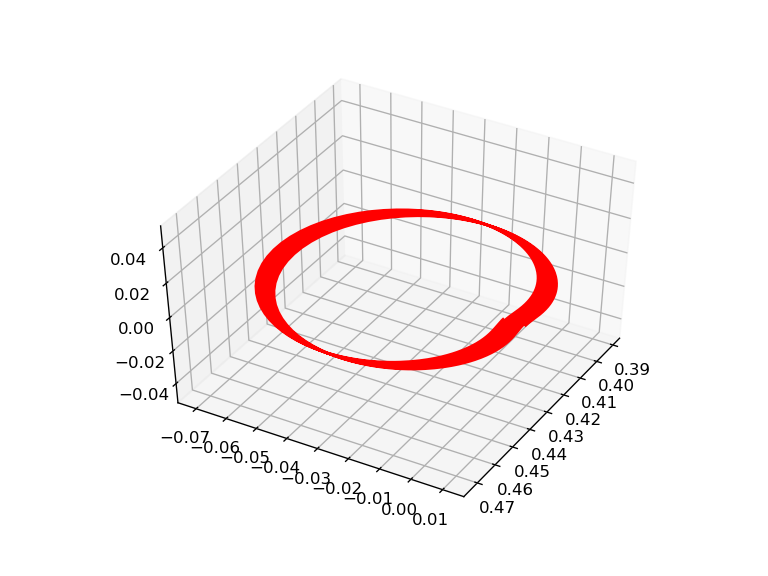

<IPython.core.display.Javascript object>


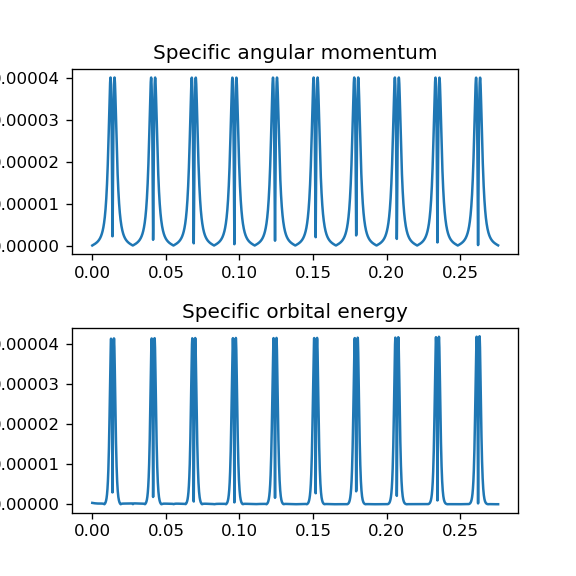

0.2757


In [16]:
# For mass change 
%matplotlib notebook
import numpy as np
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
r = 0.1
ax = plt.axes(projection= '3d' )
ax.view_init(elev=45, azim=30) #Sets view: azim sets view angle, i.e. orientation
#U= r+r/10
U=2
'''ax.axes.set_xlim3d(left=-U, right=U) #Sets axis limits
ax.axes.set_ylim3d(bottom=-U, top=U) 
ax.axes.set_zlim3d(bottom=-U, top=U) '''
ax.autoscale_view()


class Body:
    _instances=[]
    def __init__(self,name,position,radius,mass,velocity):
        self.name= name
        self.position= position
        self.radius= radius
        self.mass= mass
        self.velocity= velocity
        #self.placeBody
        Body._instances.append(self)
        
    def placeBody(self):
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        X = self.radius*(np.outer(np.cos(u), np.sin(v))) + self.position[0] #+ n, where n is position of body in space
        Y = self.radius*(np.outer(np.sin(u), np.sin(v))) + self.position[1]
        Z = self.radius*(np.outer(np.ones(np.size(u)), np.cos(v))) + self.position[2]
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
        '''
Numpy is used to create two linear arrays, one from 0 to 2 Pi that we think of as Phi, 
the azimuth angle in spherical coordinates. 
The other, from 0 to Pi, is Theta, the altitude of spherical coordinates. 
From these we calculate a set of x, y, and z that are the coordinates of points on a surface. 
Here, "np.outer" means "outer product" of two linear arrays, 
that is each of x, y, and z are matrices that contain the coordinates (x,y,z) of points on the unit sphere
or radius 10 selected by the angles u and v.
'''
        
    def Motion_relative(self,other):
        #Computing distance between other body
        sx, sy, sz= self.position[0], self.position[1], self.position[2]
        ox,oy, oz= other.position[0], other.position[1], other.position[2]
        r_sp = sqrt((ox - sx)**2 + (oy - sy)**2 + (oz - sz)**2 )
        #r_sp = sqrt((ox - sx)**2 + (oy - sy)**2)
        a_x= float(G*other.mass*(ox-sx)/(r_sp ** 3))
        a_y= float(G*other.mass*(oy-sy)/(r_sp ** 3))
        a_z= float(G*other.mass*(oz-sz)/(r_sp ** 3))
        #Look up accel for a_z
        return a_x, a_y, a_z, r_sp

from scipy.constants import e, m_e, c, epsilon_0, G as G_old 

def mass_change(BH, orbiter):
    #sol
    alpha= 100
    c_s= 300 #km/s
    v= 0
    epsilon_r = 0.1
    rho= 0.1* float(orbiter)
    sigma_t = 8/3 *np.pi *(((e ** 2)/(4*np.pi*epsilon_0*m_e* (c ** 2)))**2)
    m_accr= (alpha * 4 * np.pi * (G_old ** 2) * (float(BH) ** 2) * rho)/(((c_s ** 2) + (v ** 2)) ** (3/2))
    m_edd= (4 * np.pi * G_old * float(BH) * float(orbiter))/ (epsilon_r * sigma_t * c)
    accretion = float(min(m_accr, m_edd))
    delta_mass= accretion*(1- epsilon_r)
    return delta_mass

def mass_time_change(velocity_list, distance_list, factor, deltat):
    v= np.linalg.norm(velocity_list)
    r= np.linalg.norm(distance_list)
    E= ((v ** 2)/2) - (nu/r)
    a= -nu/(2*E)
    T= 2* np.pi * sqrt((a ** 3)/ nu)
    mass_change = float(m* ((factor/T) * deltat))
    return mass_change 

def loop(bodies):
    Period, deltat= 10,0.0001#we define timestep and total time here. Also, if we change anything here, change also for Egraph
    interval= int((Period/deltat)+1)
    data1=[]
    data2=[]
    accel= {}
    E_r= []
    E_v1, E_v2= [], []
    E_vector1, E_vector2= [], []
    nu_list=[]
    vel_rel= [bodies[0].velocity[0]- bodies[1].velocity[0], bodies[0].velocity[1]- bodies[1].velocity[1], bodies[0].velocity[2]- bodies[1].velocity[2]]
    pos_rel= [bodies[0].position[0]- bodies[1].position[0], bodies[0].position[1]- bodies[1].position[1], bodies[0].position[2]- bodies[1].position[2]]
    h_rel= np.cross(pos_rel, vel_rel)
    delta_mass= mass_time_change(vel_rel, pos_rel, 0.1, deltat)
    time_end= 0
    
    #for body in bodies:
        #body.velocity_x= float(0)
        #body.velocity_y= float(body.velocity)
        #body.placeBody()
    
    for t in np.linspace(0,Period,interval):
        for body in bodies: 
            for other in bodies:
                # Don't calculate the body's accel to itself
                if body is other:
                    continue
                a_x, a_y, a_z, r_sp = body.Motion_relative(other)
            accel[body]= (a_x,a_y, a_z, r_sp)

        for body in bodies:
            a_x, a_y, a_z, r_sp= accel[body]
            body.v_xhalf= body.velocity[0] + a_x *deltat/2
            body.v_yhalf= body.velocity[1] + a_y *deltat/2
            body.v_zhalf= body.velocity[2] + a_z *deltat/2
            xpos= body.position[0] + body.v_xhalf*deltat
            ypos= body.position[1] + body.v_yhalf*deltat
            zpos= body.position[2] + body.v_zhalf*deltat
            #posit= [body.position[0], body.position[1], body.position[2]]
            #h= np.cross(posit, body.velocity)#using angular momentum vector of previous position state and current velocity state
            body.position= [xpos,ypos,zpos]
            vel= sqrt((body.velocity[0]) ** 2 + (body.velocity[1]) ** 2 + (body.velocity[2] ** 2))
            if body is bodies[0]:
                data1.append([xpos, ypos, zpos]) #Check if we need to add zpos
                E_r.append(r_sp)
                E_vector1.append([body.velocity[0],body.velocity[1], body.velocity[2]])
                E_v1.append(vel)
                body.mass += delta_mass
                #print(delta_mass)
            else:
                data2.append([xpos,ypos, zpos])
                E_vector2.append([body.velocity[0],body.velocity[1], body.velocity[2]])
                E_v2.append(vel)
                body.mass -= delta_mass
            

        if bodies[0].mass <= 0 or bodies[1].mass <= 0:
            break
        else:
            nu_list.append(G*(bodies[0].mass + bodies[1].mass))
            
        for body in bodies:
            for other in bodies:
                # Don't calculate the body's accel to itself
                if body is other:
                    continue
                a_x, a_y, a_z, r_sp = body.Motion_relative(other)
            accel[body]= (a_x,a_y, a_z)

        for body in bodies:
            #Updating the velocity
            a_x, a_y, a_z = accel[body]
            body.velocity[0] = body.v_xhalf + a_x*deltat/2
            body.velocity[1] = body.v_yhalf + a_y*deltat/2
            body.velocity[2] = body.v_zhalf + a_z*deltat/2
            
        time_end = t
    
    #ax.plot([x[0] for x in data1], [x[1] for x in data1], [x[2] for x in data1], color= "blue")
    #ax.plot([x[0] for x in data2], [x[1] for x in data2], [x[2] for x in data2])
    
    c=[]
    for f, b in zip(data1, data2):
        u, v, w=f[0]-b[0],f[1]-b[1],f[2]-b[2]
        #w= (h_rel[0]*u + h_rel[1]*v/(-h_rel[2]))
        c.append([u, v, w])

    #ax.plot([x[0] for x in c], [x[1] for x in c], [x[2] for x in c], color= "red") #plotting relative motion
   #for x in c:
    #   print([x[0], x[1]])
    '''a=[]
    for i in c:
        a.append(i[0])
    print(max(a))
    print(min(a))
    
    b=[]
    for i in c:
        b.append(i[1])
    print(max(b))
    print(min(b))
    e= (max(E_r)-abs(min(E_r)))/(max(E_r)+abs(min(E_r))) #or take a instead of E_r
    T= 2* np.pi * sqrt((max(E_r) ** 3)/ nu)
    a= max(E_r)
    l= (max(E_r)-abs(min(E_r)))/2'''
    '''print("Eccentricity is", e)
    print("Relative time period is", T/2)
    print("Semi-latus rectum is", l)
    print("Semi-major axis is", a) '''
    
    #Calculating energy:
    E_v=[] #We can use a different formula to look at conservation of energy per mass, but need relative velocity- just add the bodies' velocities
    for v1, v2 in zip(E_v1,E_v2):
        v= 0.5*((v1 + v2) ** 2)
        E_v.append(v)   
    E=[] 
    E_part1= []
    for mass, r in zip(nu_list, E_r):
        GPE= float(mass/r)
        E_part1.append(GPE)
        
    for GPE, v in zip(E_part1, E_v):
        total= v- GPE
        E.append(total)
                       
    E_diff= []
    for x in range(len(E)-1):
        E_diff.append(abs(float((E[x]-E[x+1])/E[x])))
    #print(max(E))
 #Note: Before returning any values, place any print statement before it, otherwise won't be printed
    
    
    #Now for specific angular momentum:
    h=[]
    h_v=[]
    for v1, v2 in zip(E_vector1, E_vector2):
        x= v1[0]-v2[0]
        y= v1[1]-v2[1]
        z= v1[2]-v2[2]
        v= [x, y, z]
        h_v.append(v)
    h_vector=[]
    for v,r in zip(h_v, c):
        momentum= np.cross(r, v)
        h_vector.append(momentum)
        m= np.linalg.norm(momentum)
        h.append(m)
    h_diff= [] 
    for x in range(len(h)-1):
        a= abs(float((h[x]-h[x+1])/h[x]))
        h_diff.append(a)
    
    
    del h_diff[-1] #For some reason H_diff has an extra value over all other lists
    #Calculating p(momentum)
    p_list=[]
    for ang_mom, nu in zip(h, nu_list):
        p_list.append((ang_mom ** 2)/nu) 
    p_diff=[]
    for x in range(len(p_list)-1):
        a= abs(float((p_list[x]-p_list[x+1])/p_list[x]))
        p_diff.append(a)
    #calculating e
    '''for i in range(3):
        e_vector[i]= (pos[i]*( (v ** 2) - (nu/r))- vel[i]*(np.dot(pos, vel)) )/nu
    e= np.linalg.norm(e_vector)'''
    e_list= []
    e_part1=[]
    for ang_mom, nu in zip(h, nu_list):
        e_part1.append((ang_mom ** 2)/(nu**2))
    for part_1, energy in zip(e_part1,E):
        e= sqrt(1+ 2*(float(energy) * float(part_1)))
        e_list.append(e)
    e_diff=[]
    for x in range(len(e_list)-1):
        a= abs(float((e_list[x]-e_list[x+1])/e_list[x]))
        e_diff.append(a)
    
    #e_vector
    e_vector=[] #Just some random no.s so that they can be replaced
    e_part1=[]
    e_part2=[]
    for v,h in zip(h_v,h_vector):
        part= np.cross(v,h)
        e_part1.append(part)
        
    for part, nu in zip(e_part1,nu_list):
        mylist = [x/nu for x in part]
        e_part2.append(mylist)
        
    for part, r in zip(e_part2, c):
        normalise= [x/(np.linalg.norm(r)) for x in r]
        x= part[0]- normalise[0]
        y= part[1]- normalise[1]
        z= part[2]- normalise[2]
        e_vector.append([x,y,z])
        
    return E_diff, h_diff, p_diff, e_diff, e_vector, time_end #put all values that we need to return here
                     #If we call return for each value separately, only the last one called is taken
    
    
    
def main():
    Star= Body(name= "Star", position= (0,0,0), radius= r/10, mass=M, velocity= [float(0), float(0), float(0)])
    Planet= Body(name= "Planet", position= (0.1,0,0), radius= r/20, mass=m, velocity= [float(0), float(10), float(0)])
    i, b, p, e, e_vector, Period=loop([Star, Planet])
    
    ax = plt.axes(projection= '3d' )
    ax.view_init(elev=45, azim=30) #Sets view: azim sets view angle, i.e. orientation
    #U= r+r/10
    #U=2
    '''ax.axes.set_xlim3d(left=-U, right=U) #Sets axis limits
    ax.axes.set_ylim3d(bottom=-U, top=U) 
    ax.axes.set_zlim3d(bottom=-U, top=U) '''
    ax.autoscale_view()
    ax.plot([x[0] for x in e_vector], [x[1] for x in e_vector], [x[2] for x in e_vector], color= "red")
    
    fig = plt.figure(figsize=plt.figaspect(1.))    # Set up a figure as tall as it is wide- that's what aspect does
    deltat= 0.0001
    interval= int((Period/deltat))
    time= np.linspace(0,Period,interval)
    #Plot all the graphs
    ax = fig.add_subplot(2, 1, 2)
    ax.plot(time, i)
    ax.set_title("Specific orbital energy")
    
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(time, b)
    ax.set_title("Specific angular momentum")
                       
    '''ax = fig.add_subplot(2, 1, 2)
    ax.plot(time, p)
    ax.set_title("Momentum")
                       
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(time, e)
    ax.set_title("Eccentricity")'''
    
    plt.subplots_adjust(hspace= 0.4)
    print(Period)
        
if __name__ == "__main__":
    main()

In [2]:
def function1():
    var1 = input("Write something: ")
    var2 = input("Write something: ")
    var3 = input("Write something: ")
    return var1, var2, var3


def function2(a):
    print(a)

v1 = function1()
function2(v1)

Write something: y
Write something: u
Write something: u
('y', 'u', 'u')


In [ ]:
class MyNumber(int):
    def __add__(self, other):
        print('I am', self)
        print('I encountered', other)

x = MyNumber(2)
y = MyNumber(3)
x+y

5.997861057567476


(0, 10)

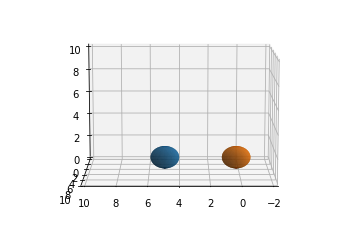

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
ax = plt.axes(projection= '3d' )
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
X = np.outer(np.cos(u), np.sin(v)) + 5 #Multiply by r/10 or something, + n instead of 5, where n is position 
X2= np.outer(np.cos(u), np.sin(v)) 
Y = np.outer(np.sin(u), np.sin(v))
Z = np.outer(np.ones(np.size(u)), np.cos(v))
'''
Numpy is used to create two linear arrays, one from 0 to 2 Pi that we think of as Phi, 
the azimuth angle in spherical coordinates. 
The other, from 0 to Pi, is Theta, the altitude of spherical coordinates. 
From these we calculate a set of x, y, and z that are the coordinates of points on a surface. 
Here, "np.outer" means "outer product" of two linear arrays, 
that is each of x, y, and z are matrices that contain the coordinates (x,y,z) of points on the unit sphere
or radius 10 selected by the angles u and v.
'''


ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
ax.plot_surface(X2, Y, Z, rstride=1, cstride=1)
ax.view_init(elev=10., azim=90) #Sets view: azim sets view angle, i.e. orientation
ax.axes.set_xlim3d(left=-2, right=10) #Sets axis limits
ax.axes.set_ylim3d(bottom=0, top=10) 
ax.axes.set_zlim3d(bottom=0, top=10) 


In [1]:
#Best to use double precision if going on the fly

In [2]:
#For angular momentum (total specific relativ(from one mass' rest frame or centre of mass)), for mass, use relative mass, nu
#If not, know angular momentum is cross product of distance from point and... So as body of planets moves 
#r(theta)= P/(1+e*cos(theta-theta_initial)))

Intial position is 1.7320508075688772
Initial velocity is 2.0
Angular momentum vector is [-2.  0.  2.]
Angular momentum is 2.8284271247461903
Theoretical eccentricity is 0.762949587664061
Eccentricity vector is [-0.3526745950472101, 0.5773502691896258, -0.3526745950472101]
Theoretical orbital period is 82.72720432808599
Max distance is 9.067776288056125
Max distance should be 2.1641821092264193
Theoretical semi-latus rectum is 3.6769051761756675


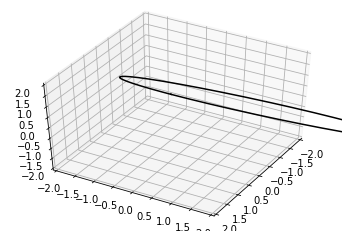

In [8]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
r= sqrt(3)

ax = plt.axes(projection= '3d' )
ax.view_init(elev=45, azim=30) #Sets view: azim sets view angle, i.e. orientation
#U= r+r/10
U=2
ax.axes.set_xlim3d(left=-U, right=U) #Sets axis limits
ax.axes.set_ylim3d(bottom=-U, top=U) 
ax.axes.set_zlim3d(bottom=-U, top=U) 
ax.autoscale_view()

class Body:
    _instances=[]
    def __init__(self,name,position,radius,mass,velocity):
        self.name= name
        self.position= position
        self.radius= radius
        self.mass= mass
        self.velocity= velocity
        self.placeBody
        Body._instances.append(self)
        
    def placeBody(self):
        u = np.linspace(0, 2 * np.pi, 100)
        v = np.linspace(0, np.pi, 100)
        X = self.radius*(np.outer(np.cos(u), np.sin(v))) + self.position[0] #+ n, where n is position of body in space
        Y = self.radius*(np.outer(np.sin(u), np.sin(v))) + self.position[1]
        Z = self.radius*(np.outer(np.ones(np.size(u)), np.cos(v))) + self.position[2]
        ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
        '''
Numpy is used to create two linear arrays, one from 0 to 2 Pi that we think of as Phi, 
the azimuth angle in spherical coordinates. 
The other, from 0 to Pi, is Theta, the altitude of spherical coordinates. 
From these we calculate a set of x, y, and z that are the coordinates of points on a surface. 
Here, "np.outer" means "outer product" of two linear arrays, 
that is each of x, y, and z are matrices that contain the coordinates (x,y,z) of points on the unit sphere
or radius 10 selected by the angles u and v.
'''
        
    def Motion_relative(self,other):
        #Computing distance between other body
        sx, sy, sz= self.position[0], self.position[1], self.position[2]
        ox,oy, oz= other.position[0], other.position[1], other.position[2]
        r_sp = sqrt((ox - sx)**2 + (oy - sy)**2 + (oz - sz)**2 )
        #r_sp = sqrt((ox - sx)**2 + (oy - sy)**2)
        a_x= float(G*other.mass*(ox-sx)/(r_sp ** 3))
        a_y= float(G*other.mass*(oy-sy)/(r_sp ** 3))
        a_z= float(G*other.mass*(oz-sz)/(r_sp ** 3))
        #Look up accel for a_z
        return a_x, a_y, a_z, r_sp
    
def AnalyticSolution(bodies):
    #In 2D:
    #First we get angular momentum (h), then use eq. p= h^2/reduced mass to get p, then find e, before
    #subbing all into this eq. r(theta)= P/(1+e*cos(theta-theta_initial))
    pos, vel = [], []
    for body in bodies:
        pos.append(body.position)
        vel.append(body.velocity)
    
    #Now get initial relative motions
    pos= [pos[0][0]-pos[1][0], pos[0][1]-pos[1][1], pos[0][2]-pos[1][2]]
    r= np.linalg.norm(pos)
    print("Intial position is", r)
    vel= [vel[0][0]-vel[1][0], vel[0][1]-vel[1][1], vel[0][2]-vel[1][2]]
    v= np.linalg.norm(vel)
    print("Initial velocity is", v)
    
    #Calculating angular momentum
    h_vector= np.cross(pos, vel)
    h= np.linalg.norm(h_vector)
    print("Angular momentum vector is", h_vector)
    print("Angular momentum is", h)
    
    #Calculating p
    p= (h ** 2)/nu
    
    #Calculating e
    e_vector=[1,2,3] #Just some random no.s so that they can be replaced
    for i in range(3):
        e_vector[i]= (pos[i]*( (v ** 2) - (nu/r))- vel[i]*(np.dot(pos, vel)) )/nu
    e= np.linalg.norm(e_vector)
    print("Theoretical eccentricity is", e)
    print("Eccentricity vector is", e_vector)
    
    #Subbing into equation
    position= []
    for theta in np.linspace(0, 2*np.pi, 360):
        x= np.cos(theta) * (p/(1+e*np.cos(theta))) - pos[0]
        y= np.sin(theta) * (p/(1+e*np.cos(theta))) - pos[1]
        position.append([x, y])
    
    #Transforming into 3D by getting value of z from h: r_vector (dot product) h_vector gives 0
    h1, h2, h3= h_vector[0], h_vector[1], h_vector[2]
    pos_3D= []
    for i in range(360):
        z= (h1*position[i][0] + h2*position[i][1])/(-h3) - pos[2]
        pos_3D.append([position[i][0], position[i][1], z])
    ax.plot([x[0] for x in pos_3D], [x[1] for x in pos_3D], [x[2] for x in pos_3D], color="black")
    
    #Finding semi-major axis and all
    position = []
    for i in range(360):
        p= sqrt( (pos_3D[i][0])** 2 + (pos_3D[i][1]) ** 2 + (pos_3D[i][2]) ** 2)
        position.append(p)
    #Wrong calculations of semi-major axis and rest
    T= 2* np.pi * sqrt((max(position) ** 3)/ nu)
    a= max(position)
    l= (max(position)-min(position))/2 
    print("Theoretical orbital period is", T)
    print("Max distance is", a)
    print("Max distance should be", p/(1+e))
    print("Theoretical semi-latus rectum is", l)
    
    
def main():
    Star= Body(name= "Star", position= (0,0,-1), radius= r/10, mass=M, velocity= [float(0), float(0), float(0)])
    Planet= Body(name= "Planet", position= (1,1,0), radius= r/20, mass=m, velocity= [float(0), float(2), float(0)])
    AnalyticSolution([Star, Planet])
    
if __name__ == "__main__":
    main()

In [10]:
from scipy.constants import e, m_e, c, epsilon_0, G as G_old 
def mass_change(BH, orbiter):
    solar_mass= M_sun/u.kg
    BH_mass_kg = float(BH)* solar_mass
    body_mass_kg= float(orbiter) * solar_mass
    alpha= 100
    c_s= 300 #km/s
    v= 0
    epsilon_r = 0.1
    rho= 0.1* float(body_mass_kg)
    sigma_t = 8/3 *np.pi *(((e ** 2)/(4*np.pi*epsilon_0*m_e* (c ** 2)))**2)
    m_accr= (alpha * 4 * np.pi * (G_old ** 2) * (float(BH_mass_kg) ** 2) * rho)/(((c_s ** 2) + (v ** 2)) ** (3/2))
    m_edd= (4 * np.pi * G_old * float(BH_mass_kg) * float(body_mass_kg))/ (epsilon_r * sigma_t * c)
    accretion = float(min(m_accr, m_edd))
    delta_mass= accretion*(1- epsilon_r)/solar_mass
    return delta_mass
a= mass_change(M, m)
print(a)

6.817461435194832e+78
4.593204975771453e+40


<IPython.core.display.Javascript object>


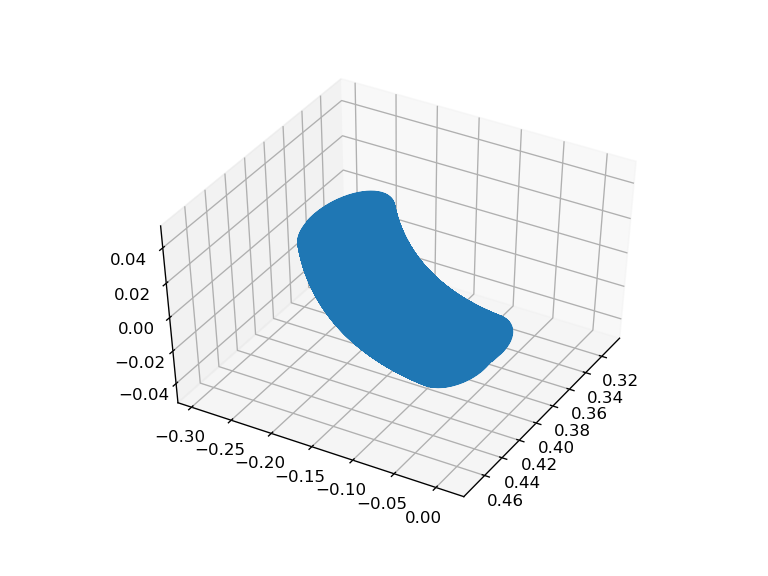

<IPython.core.display.Javascript object>


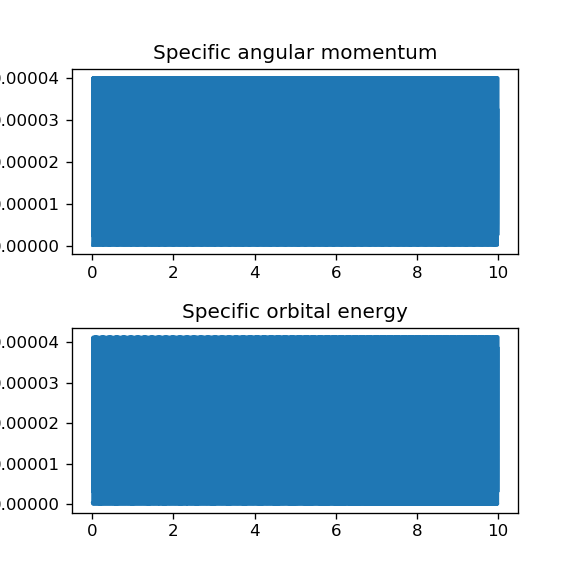

In [3]:
%matplotlib notebook
import numpy as np
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


class Body:
    _instances=[]
    def __init__(self,name,position,radius,mass,velocity):
        self.name= name
        self.position= position
        self.radius= radius
        self.mass= mass
        self.velocity= velocity
        Body._instances.append(self)

        
    def Motion_relative(self,other):
        #Computing distance between other body
        sx, sy, sz= self.position[0], self.position[1], self.position[2]
        ox,oy, oz= other.position[0], other.position[1], other.position[2]
        r_sp = sqrt((ox - sx)**2 + (oy - sy)**2 + (oz - sz)**2 )
        #r_sp = sqrt((ox - sx)**2 + (oy - sy)**2)
        a_x= float(G*other.mass*(ox-sx)/(r_sp ** 3))
        a_y= float(G*other.mass*(oy-sy)/(r_sp ** 3))
        a_z= float(G*other.mass*(oz-sz)/(r_sp ** 3))
        #Look up accel for a_z
        return a_x, a_y, a_z, r_sp

def loop(bodies):
    Period, deltat= 10, 0.0001 #we define timestep and total time here. Also, if we change anything here, change also for Egraph
    interval= int((Period/deltat)+1)
    data1=[]
    data2=[]
    accel= {}
    E_r= []
    E_v1, E_v2= [], []
    E_vector1, E_vector2= [], []
    vel_rel= [bodies[0].velocity[0]- bodies[1].velocity[0], bodies[0].velocity[1]- bodies[1].velocity[1], bodies[0].velocity[2]- bodies[1].velocity[2]]
    pos_rel= [bodies[0].position[0]- bodies[1].position[0], bodies[0].position[1]- bodies[1].position[1], bodies[0].position[2]- bodies[1].position[2]]
    h_rel= np.cross(pos_rel, vel_rel)
        
    for t in np.linspace(0,Period,interval):
        for body in bodies: 
            for other in bodies:
                # Don't calculate the body's accel to itself
                if body is other:
                    continue
                a_x, a_y, a_z, r_sp = body.Motion_relative(other)
            accel[body]= (a_x,a_y, a_z, r_sp)
            
        for body in bodies:
            a_x, a_y, a_z, r_sp= accel[body]
            body.v_xhalf= body.velocity[0] + a_x *deltat/2
            body.v_yhalf= body.velocity[1] + a_y *deltat/2
            body.v_zhalf= body.velocity[2] + a_z *deltat/2
            xpos= body.position[0] + body.v_xhalf*deltat
            ypos= body.position[1] + body.v_yhalf*deltat
            zpos= body.position[2] + body.v_zhalf*deltat
            #posit= [body.position[0], body.position[1], body.position[2]]
            #h= np.cross(posit, body.velocity)#using angular momentum vector of previous position state and current velocity state
            body.position= [xpos,ypos,zpos]
            vel= sqrt((body.velocity[0]) ** 2 + (body.velocity[1]) ** 2 + (body.velocity[2] ** 2))
            if body is bodies[0]:
                data1.append([xpos, ypos, zpos]) #Check if we need to add zpos
                E_r.append(r_sp)
                E_vector1.append([body.velocity[0],body.velocity[1], body.velocity[2]])
                E_v1.append(vel)
            else:
                data2.append([xpos,ypos, zpos])
                E_vector2.append([body.velocity[0],body.velocity[1], body.velocity[2]])
                E_v2.append(vel)
            #print(body.v_xhalf)
            #print(xpos)
        
        for body in bodies:
                #r_sp = sqrt((target_body.xpos - external_body.position[0])**2 + (target_body.ypos - external_body.position[1])**2) #updated distance of planet from star
            for other in bodies:
                # Don't calculate the body's accel to itself
                if body is other:
                    continue
                a_x, a_y, a_z, r_sp = body.Motion_relative(other)
            accel[body]= (a_x,a_y, a_z)
        
        for body in bodies:
            #Updating the velocity
            a_x, a_y, a_z = accel[body]
            #body_now.accel_x= float(G*m2*(xpos-(external_body.position[0]))/(r_sp ** 3))
            #body_now.accel_y= float(G*m2*(ypos-(external_body.position[1]))/(r_sp ** 3))
            body.velocity[0] = body.v_xhalf + a_x*deltat/2
            body.velocity[1] = body.v_yhalf + a_y*deltat/2
            body.velocity[2] = body.v_zhalf + a_z*deltat/2
            #print(body.v_xhalf)
            #print(a_x)
            #body_now.position= (xpos, ypos)
            #data.append([body_now.position[0], body_now.position[1]])
    
    c=[]
    for f, b in zip(data1, data2):
        u, v, w=f[0]-b[0],f[1]-b[1],f[2]-b[2]
        #w= (h_rel[0]*u + h_rel[1]*v/(-h_rel[2]))
        c.append([u, v, w])


    
    #Calculating energy:
    E_v=[] #We can use a different formula to look at conservation of energy per mass, but need relative velocity- just add the bodies' velocities
    for v1, v2 in zip(E_v1,E_v2):
        v= 0.5*((v1 + v2) ** 2)
        E_v.append(v)   
    E=[] 
    for v, r in zip(E_v, E_r):
        Total= v- (nu/r)
        E.append(Total)
    for x in range(len(E)-1):
        E[x]= abs(float((E[x]-E[x+1])/E[x]))
    del E[-1] 
    #print(max(E))
 #Note: Before returning any values, place any print statement before it, otherwise won't be printed
    
    
    #Now for specific angular momentum:
    h=[]
    h_v=[]
    for v1, v2 in zip(E_vector1, E_vector2):
        x= v1[0]-v2[0]
        y= v1[1]-v2[1]
        z= v1[2]-v2[2]
        v= [x, y, z]
        h_v.append(v)
    
    h_vector=[]
    for v,r in zip(h_v, c):
        momentum= np.cross(r, v)
        h_vector.append(momentum)
        m= np.linalg.norm(momentum)
        h.append(m)
    h_diff= [] 
    a=0
    for x in range(len(h)-1):
        a= abs(float((h[x]-h[x+1])/h[x]))
        h_diff.append(a)
    
    
    #e_vector
    e_vector=[] #Just some random no.s so that they can be replaced
    e_part1=[]
    e_part2=[]
    for v,h in zip(h_v,h_vector):
        part= np.cross(v,h)
        e_part1.append(part)
        
    for part in e_part1:
        mylist = [x/nu for x in part]
        e_part2.append(mylist)
        
    for part, r in zip(e_part2, c):
        normalise= [x/(np.linalg.norm(r)) for x in r]
        x= part[0]- normalise[0]
        y= part[1]- normalise[1]
        z= part[2]- normalise[2]
        e_vector.append([x,y,z])
        
    return E, h_diff, e_vector #put all values that we need to return here
                     #If we call return for each value separately, only the last one called is taken
    

    
def main():
    Star= Body(name= "Star", position= (0,0,0), radius= r/10, mass=M, velocity= [float(0), float(0), float(0)])
    Planet= Body(name= "Planet", position= (0.1,0,0), radius= r/20, mass=m, velocity= [float(0), float(10), float(0)])
    #AnalyticSolution([Star, Planet]) #Place it before loop function otherwise the initial conditions no longer remain
    i, b, e_vector =loop([Star, Planet])
    
    ax = plt.axes(projection= '3d' )
    ax.view_init(elev=45, azim=30) #Sets view: azim sets view angle, i.e. orientation
    ax.autoscale_view()
    ax.plot([x[0] for x in e_vector], [x[1] for x in e_vector], [x[2] for x in e_vector])
    
    fig = plt.figure(figsize=plt.figaspect(1.))    # Set up a figure as tall as it is wide- that's what aspect does
    Period, deltat= 10, 0.0001
    interval= int((Period/deltat))
    time= np.linspace(0,Period,interval)
    #Plot all the graphs
    ax = fig.add_subplot(2, 1, 2)
    ax.plot(time, i)
    ax.set_title("Specific orbital energy")
    
    ax = fig.add_subplot(2, 1, 1)
    ax.plot(time, b)
    ax.set_title("Specific angular momentum")
    
    plt.subplots_adjust(hspace= 0.4)
   

        
if __name__ == "__main__":
    main()